In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/My Drive/kaggle_dataset/Satellite Image Classification/data

/content/gdrive/My Drive/kaggle_dataset/Satellite Image Classification/data


In [4]:
!ls

cloudy	desert	green_area  water


In [5]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report

In [6]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [7]:
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/kaggle_dataset/Satellite Image Classification/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 3028 images belonging to 4 classes.


In [8]:
test_generator = train_datagen.flow_from_directory(
     '/content/gdrive/My Drive/kaggle_dataset/Satellite Image Classification/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 1296 images belonging to 4 classes.


Found 4324 files belonging to 4 classes.


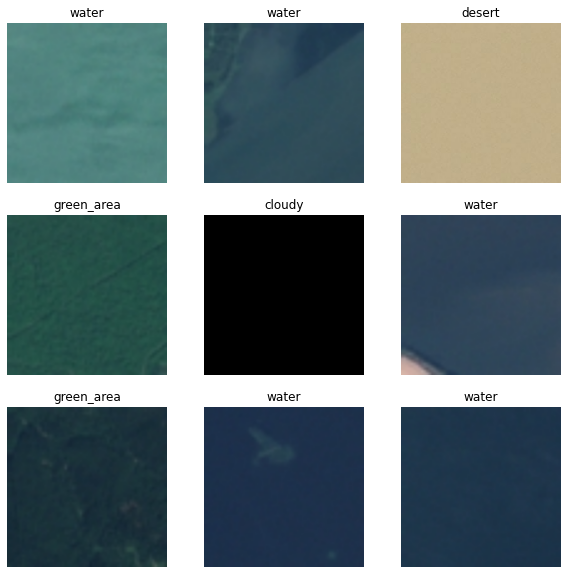

In [17]:
train_dataset = image_dataset_from_directory('/content/gdrive/My Drive/kaggle_dataset/Satellite Image Classification/data',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [ ]:
# VGG19 Model

vgg_model =  VGG19(include_top=True , weights='imagenet')

for models in vgg_model.layers:

  models.trainable= False

  vgg_model.summary()

In [ ]:
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)

model.add(Dense(4, activation='softmax'))

model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

model.summary()

In [13]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 50)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
95/95 [==============================] - 102s 944ms/step - loss: 1.2654 - accuracy: 0.4574 - val_loss: 1.1076 - val_accuracy: 0.3989
Epoch 2/50
95/95 [==============================] - 76s 803ms/step - loss: 0.9669 - accuracy: 0.6731 - val_loss: 0.8613 - val_accuracy: 0.7569
Epoch 3/50
95/95 [==============================] - 76s 804ms/step - loss: 0.7927 - accuracy: 0.7665 - val_loss: 0.7466 - val_accuracy: 0.8071
Epoch 4/50
95/95 [==============================] - 76s 800ms/step - loss: 0.6896 - accuracy: 0.7962 - val_loss: 0.7133 - val_accuracy: 0.7546
Epoch 5/50
95/95 [==============================] - 77s 811ms/step - loss: 0.6449 - accuracy: 0.7959 - val_loss: 0.5916 - val_accuracy: 0.8279
Epoch 6/50
95/95 [==============================] - 77s 811ms/step - loss: 0.5676 - accuracy: 0.8431 - val_loss: 0.5802 - val_accuracy: 0.8140
Epoch 7/50
95/95 [==============================] - 77s 812ms/step - loss: 0.5335 - accuracy: 0.8484 - val_loss: 0.5069 - val_accuracy: 0.861

In [14]:
model.evaluate(test_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


41/41 [==============================] - 23s 566ms/step - loss: 0.2811 - accuracy: 0.9082


[0.2811118960380554, 0.908178985118866]

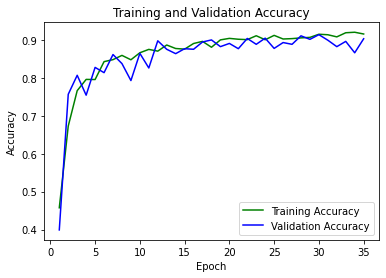

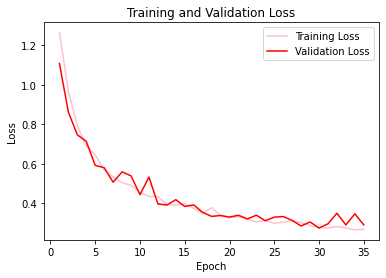

In [16]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
model.save('vgg19_model_local_final.h5')